<a href="https://colab.research.google.com/github/neerajkumarkannoujiya/IIITA-Assesment/blob/main/MSD2024017_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Libraries**

In [39]:
import itertools
from collections import defaultdict


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Implement the function of Hash-based apriori**

In [40]:
def hash_apriori(transactions, min_support):
    def get_frequent_itemsets(itemsets, support_counts, min_support):
        frequent_itemsets = []
        for itemset in itemsets:
            if support_counts[itemset] >= min_support:
                frequent_itemsets.append(itemset)
        return frequent_itemsets

    def generate_candidates(frequent_itemsets, k):
        candidates = []
        for i in range(len(frequent_itemsets)):
            for j in range(i + 1, len(frequent_itemsets)):
                candidate = tuple(sorted(set(frequent_itemsets[i]) | set(frequent_itemsets[j])))
                if len(candidate) == k and candidate not in candidates:
                    candidates.append(candidate)
        return candidates

    def hash_function(itemset):

        return sum([hash(item) for item in itemset]) % hash_table_size


    hash_table_size = 100
    hash_table = defaultdict(int)


    candidate_1_itemsets = set()
    for transaction in transactions:
        for item in transaction:
            candidate_1_itemsets.add((item,))

    support_counts = defaultdict(int)
    for transaction in transactions:
        for itemset in candidate_1_itemsets:
            if set(itemset).issubset(transaction):
                support_counts[itemset] += 1


    frequent_itemsets = get_frequent_itemsets(candidate_1_itemsets, support_counts, min_support)
    all_frequent_itemsets = frequent_itemsets.copy()

    k = 2
    while frequent_itemsets:
        candidates_k_itemsets = generate_candidates(frequent_itemsets, k)
        support_counts = defaultdict(int)

        for transaction in transactions:
            for candidate in candidates_k_itemsets:
                if set(candidate).issubset(transaction):
                    hash_value = hash_function(candidate)
                    hash_table[hash_value] += 1
                    support_counts[candidate] += 1

        frequent_itemsets = get_frequent_itemsets(candidates_k_itemsets, support_counts, min_support)
        all_frequent_itemsets.extend(frequent_itemsets)
        k += 1

    return all_frequent_itemsets




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:

import random

def generate_random_dataset(num_transactions, num_items, max_items_per_transaction):
    items = [f"item_{i}" for i in range(num_items)]
    transactions = []
    for _ in range(num_transactions):
        num_items_in_transaction = random.randint(1, max_items_per_transaction)
        transaction = random.sample(items, num_items_in_transaction)
        transactions.append(transaction)
    return transactions


# Example usage:
num_transactions = 100
num_items = 10
max_items_per_transaction = 5

transactions = generate_random_dataset(num_transactions, num_items, max_items_per_transaction)

# print(transactions)

# Minimum support threshold
min_support = 2

# Run the hash-based Apriori algorithm
frequent_itemsets = hash_apriori(transactions, min_support)

# Output the frequent itemsets
print("Frequent Itemsets:", frequent_itemsets)



Frequent Itemsets: [('item_6',), ('item_1',), ('item_4',), ('item_3',), ('item_7',), ('item_2',), ('item_0',), ('item_8',), ('item_5',), ('item_9',), ('item_1', 'item_6'), ('item_4', 'item_6'), ('item_3', 'item_6'), ('item_6', 'item_7'), ('item_2', 'item_6'), ('item_0', 'item_6'), ('item_6', 'item_8'), ('item_5', 'item_6'), ('item_6', 'item_9'), ('item_1', 'item_4'), ('item_1', 'item_3'), ('item_1', 'item_7'), ('item_1', 'item_2'), ('item_0', 'item_1'), ('item_1', 'item_8'), ('item_1', 'item_5'), ('item_1', 'item_9'), ('item_3', 'item_4'), ('item_4', 'item_7'), ('item_2', 'item_4'), ('item_0', 'item_4'), ('item_4', 'item_8'), ('item_4', 'item_5'), ('item_4', 'item_9'), ('item_3', 'item_7'), ('item_2', 'item_3'), ('item_0', 'item_3'), ('item_3', 'item_8'), ('item_3', 'item_5'), ('item_3', 'item_9'), ('item_2', 'item_7'), ('item_0', 'item_7'), ('item_7', 'item_8'), ('item_5', 'item_7'), ('item_7', 'item_9'), ('item_0', 'item_2'), ('item_2', 'item_8'), ('item_2', 'item_5'), ('item_2', 'it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


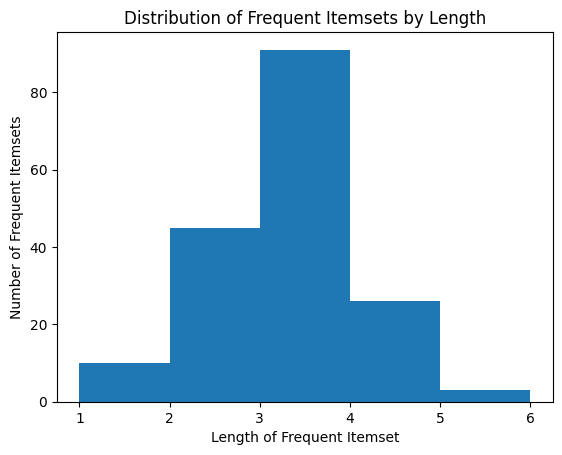

In [46]:
# prompt: plot the graph of frequent_itemsets of above program

import matplotlib.pyplot as plt

# Assuming frequent_itemsets is a list of tuples, where each tuple represents a frequent itemset
itemset_lengths = [len(itemset) for itemset in frequent_itemsets]

# Create a histogram of itemset lengths
plt.hist(itemset_lengths, bins=range(min(itemset_lengths), max(itemset_lengths) + 2))
plt.xlabel("Length of Frequent Itemset")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Distribution of Frequent Itemsets by Length")
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


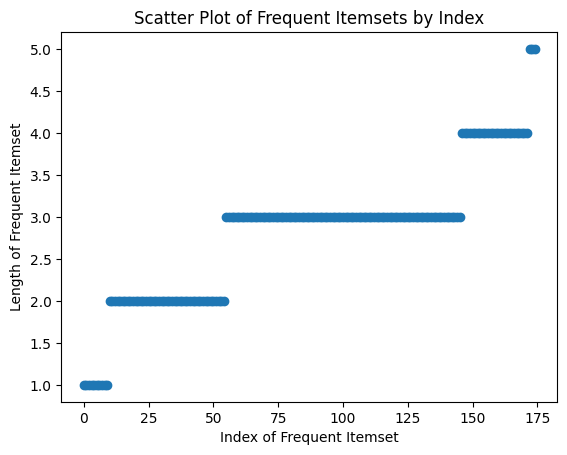

In [47]:
# The scatter diagram of dataset is shown bellow

plt.scatter(range(len(itemset_lengths)), itemset_lengths)
plt.xlabel("Index of Frequent Itemset")
plt.ylabel("Length of Frequent Itemset")
plt.title("Scatter Plot of Frequent Itemsets by Index")
plt.show()